# Análisis Exploratorio de Datos

## Importar librerías y paquetes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Importar datos para analizar

Importacion de la hoja de calculo - Internet

In [4]:
file_path = '../data/raw/Internet.xlsx'

# Cargar el libro completo como un diccionario de DataFrames
excel_data = pd.read_excel(file_path, sheet_name=None)

print("Hojas disponibles:", excel_data.keys())

Hojas disponibles: dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])


## EDA

Este análisis exploratorio tiene como objetivo principal identificar patrones de acceso a internet y evaluar el comportamiento de las telecomunicaciones a nivel nacional. En línea con el KPI principal, se buscará reconocer provincias con menor penetración de acceso a internet y tecnologías clave que permitan alcanzar un aumento del 2% en el próximo trimestre. Además, el análisis explorará la relación entre otros servicios de telecomunicaciones y su impacto en el desarrollo del sector.

Despues de una vista previa de la informacion contenida en el archivo de Excel, para el análisis exploratorio de datos (EDA), se decidio no utilizar ciertas hojas del archivo Excel debido a su naturaleza y relevancia limitada para los objetivos del proyecto:

- **Acc_vel_loc_sinrangos**: Contiene datos demasiado granulares, lo que dificulta su análisis a un nivel más agregado y significativo.
- **Velocidad_sin_Rangos**: Incluye datos irrelevantes y poco entendibles para este análisis.
- **Accesos_tecnologia_localidad**: Presenta datos demasiado granulares; sin embargo, podría valorarse posteriormente por su detalle por tecnología y localidad.
- **Totales Accesos por velocidad**: Es redundante, ya que su contenido está mejor reflejado en la hoja **Accesos por velocidad**.
- **Dial-BAf**: Limitada a solo dos tecnologías, lo que no refleja el panorama completo del sector.
- **Totales Dial-BAf**: También limitada a solo dos tecnologías, presentando la misma restricción.

Estas exclusiones permiten enfocar el análisis en hojas más representativas y relevantes para los objetivos del proyecto.


### Funciones para limpieza de datos

In [5]:
def info(df):
    print(df.info())
    print(df.describe())
    
def checkNulls(df):
    print(df.isnull().sum())
    
def checkDuplicates(df, subset=None):
    num_duplicados = df.duplicated(subset=subset).sum()
    print(f"Número de filas duplicadas: {num_duplicados}")

    # Mostrar filas duplicadas si existen
    if num_duplicados > 0:
        print("Filas duplicadas:")
        print(df[df.duplicated(subset=subset, keep=False)])

### Analisis de penetracion de Internet

In [6]:
# Cargar una hoja específica
dfPenetracionPais = pd.read_excel(file_path, sheet_name='Penetracion-totales')

print(dfPenetracionPais.head())

    Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0  2024          2                         78.13                     24.57   
1  2024          1                         78.89                     24.79   
2  2023          4                         78.56                     24.66   
3  2023          3                         77.84                     24.41   
4  2023          2                         77.02                     24.14   

         Periodo  
0   Abr-Jun 2024  
1   Ene-Mar 2024  
2   Oct-Dic 2023  
3  Jul-Sept 2023  
4   Abr-Jun 2023  


In [7]:
# Funciones de limpieza de datos
info(dfPenetracionPais)
checkNulls(dfPenetracionPais)
checkDuplicates(dfPenetracionPais)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           42 non-null     int64  
 1   Trimestre                     42 non-null     int64  
 2   Accesos por cada 100 hogares  42 non-null     float64
 3   Accesos por cada 100 hab      42 non-null     float64
 4   Periodo                       42 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB
None
               Año  Trimestre  Accesos por cada 100 hogares  \
count    42.000000  42.000000                     42.000000   
mean   2018.761905   2.452381                     63.201813   
std       3.074756   1.130560                      9.950321   
min    2014.000000   1.000000                     49.545821   
25%    2016.000000   1.250000                     53.784644   
50%    2019.000000   2.000000           

Deteccion de Outliers

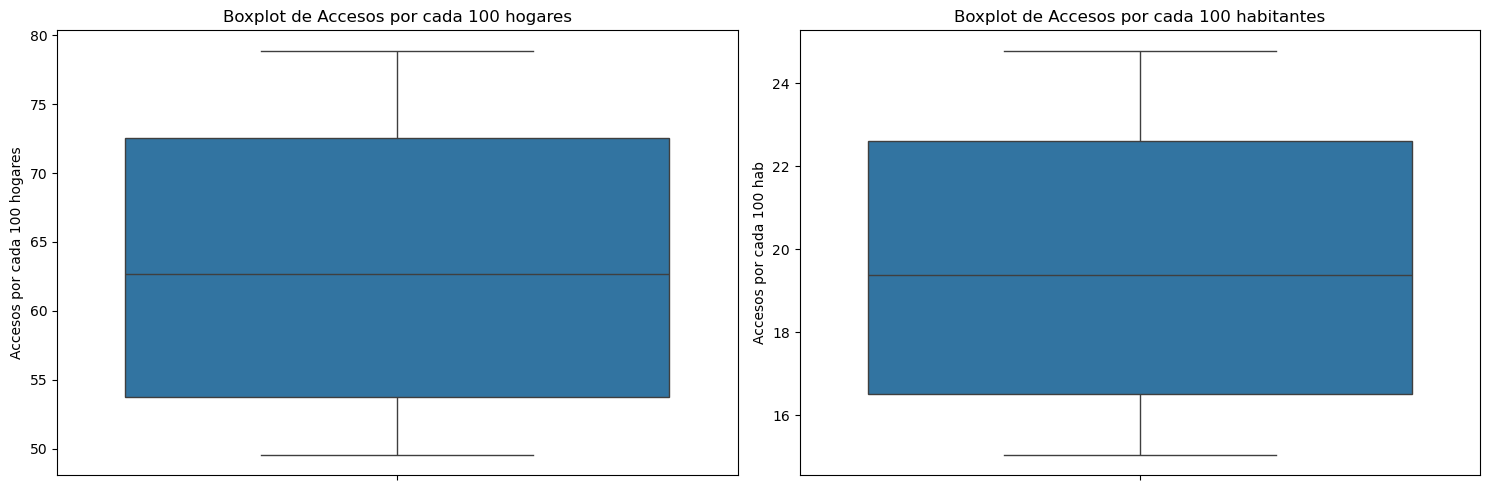

In [8]:
plt.figure(figsize=(15, 5))

# Primer boxplot: Accesos por cada 100 hogares
plt.subplot(1, 2, 1)
sns.boxplot(data=dfPenetracionPais['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')

# Segundo boxplot: Accesos por cada 100 habitantes
plt.subplot(1, 2, 2)
sns.boxplot(data=dfPenetracionPais['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 habitantes')

plt.tight_layout()
plt.show()

Agrupamiento de datos por ano para verificación de la distribución de los datos

In [9]:
dfPenetracionPaisAnio = dfPenetracionPais.groupby(['Año'])[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean().round(2)
dfPenetracionPaisAnio.reset_index(inplace=True)

dfPenetracionPaisAnio.tail()

,Año,Accesos por cada 100 hogares,Accesos por cada 100 hab
6,2020,65.25,20.25
7,2021,70.24,21.87
8,2022,75.92,23.72
9,2023,77.66,24.34
10,2024,78.51,24.68


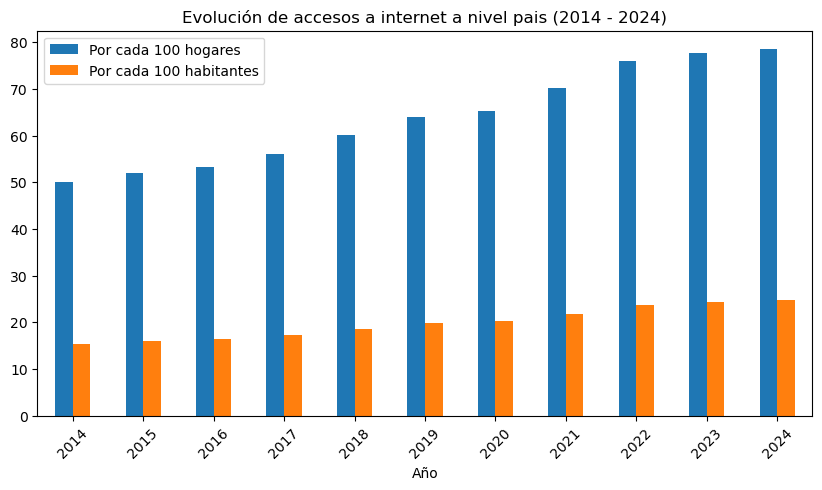

In [10]:
dfPenetracionPaisAnio.plot(
    kind='bar',
    x='Año',
    y=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'],
    rot=45,
    figsize=(10, 5)
)
plt.title('Evolución de accesos a internet a nivel pais (2014 - 2024)')
plt.legend(['Por cada 100 hogares', 'Por cada 100 habitantes'])
plt.show()

Los gráficos muestran un crecimiento sostenido en los últimos 10 años en el acceso a internet, tanto en hogares como en habitantes. En 2024, se observa que por cada 100 hogares, hay aproximadamente 79 accesos a internet, mientras que por cada 100 habitantes, hay 25 accesos. Esto indica que una gran parte de los accesos a internet se realiza desde los hogares, pero el acceso a internet fuera de ellos (por ejemplo, en lugares públicos o privados diferentes a los hogares) es significativamente menor en comparación.


In [11]:
dfPenetracionPaisTrimestre = dfPenetracionPais.groupby(['Trimestre'])[['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']].mean().round(2)
dfPenetracionPaisTrimestre.reset_index(inplace=True)

dfPenetracionPaisTrimestre.head()

,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,1,62.64,19.39
1,2,63.47,19.67
2,3,63.16,19.55
3,4,63.58,19.70


La cantidad de accesos es similar durante el año, aunque aumenta ligeramente hacia el final del año.

### Análisis de Penetración en hogares

In [12]:
# Cargar una hoja específica
dfPenetracionHogares = pd.read_excel(file_path, sheet_name='Penetracion-hogares')

print(dfPenetracionHogares.head())

    Año  Trimestre        Provincia  Accesos por cada 100 hogares
0  2024          2     Buenos Aires                         79.84
1  2024          2  Capital Federal                        116.37
2  2024          2        Catamarca                         68.81
3  2024          2            Chaco                         44.06
4  2024          2           Chubut                         86.33


In [13]:
# Funciones de limpieza de datos
info(dfPenetracionHogares)
checkNulls(dfPenetracionHogares)
checkDuplicates(dfPenetracionHogares)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           1000 non-null   int64  
 1   Trimestre                     1000 non-null   int64  
 2   Provincia                     1000 non-null   object 
 3   Accesos por cada 100 hogares  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
               Año    Trimestre  Accesos por cada 100 hogares
count  1000.000000  1000.000000                   1000.000000
mean   2018.800000     2.464000                     52.794973
std       3.021445     1.114426                     24.135063
min    2014.000000     1.000000                      9.513970
25%    2016.000000     1.000000                     33.957657
50%    2019.000000     2.000000                     50.133004
75%    2021.000000     3.000000        

In [14]:
#Dataframe de hogares agrupados por provincia y por año
dfPenetracionHogaresAnualProvincia = dfPenetracionHogares.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].mean().round(2).reset_index()
dfPenetracionHogaresAnualProvincia.head()

,Año,Provincia,Accesos por cada 100 hogares
0,2014,Buenos Aires,55.62
1,2014,Capital Federal,113.52
2,2014,Catamarca,24.79
3,2014,Chaco,21.16
4,2014,Chubut,40.87


In [15]:
# Crear diccionario con cada provincia y sus valores
dictProvinciasValoresHogares = dfPenetracionHogaresAnualProvincia.groupby('Provincia')['Accesos por cada 100 hogares'].apply(list).to_dict()

# Función para calcular el porcentaje de crecimiento
def calcular_crecimiento(lista):
    return round((lista[-1] - lista[0]) / lista[0] * 100, 2)

# Crear un nuevo diccionario con los porcentajes de crecimiento
dictCrecimientoProvincias = {
    provincia: calcular_crecimiento(valores) for provincia, valores in dictProvinciasValoresHogares.items()
}

print(dictCrecimientoProvincias)


{'Buenos Aires': 44.68, 'Capital Federal': 3.9, 'Catamarca': 177.61, 'Chaco': 114.46, 'Chubut': 109.47, 'Corrientes': 126.48, 'Córdoba': 68.91, 'Entre Ríos': 96.94, 'Formosa': 124.39, 'Jujuy': 208.84, 'La Pampa': 96.55, 'La Rioja': 381.18, 'Mendoza': 62.66, 'Misiones': 142.95, 'Neuquén': 51.18, 'Río Negro': 56.64, 'Salta': 91.68, 'San Juan': 84.3, 'San Luis': 958.01, 'Santa Cruz': 141.48, 'Santa Fe': 64.37, 'Santiago Del Estero': 194.53, 'Tierra Del Fuego': 67.21, 'Tucumán': 76.34}


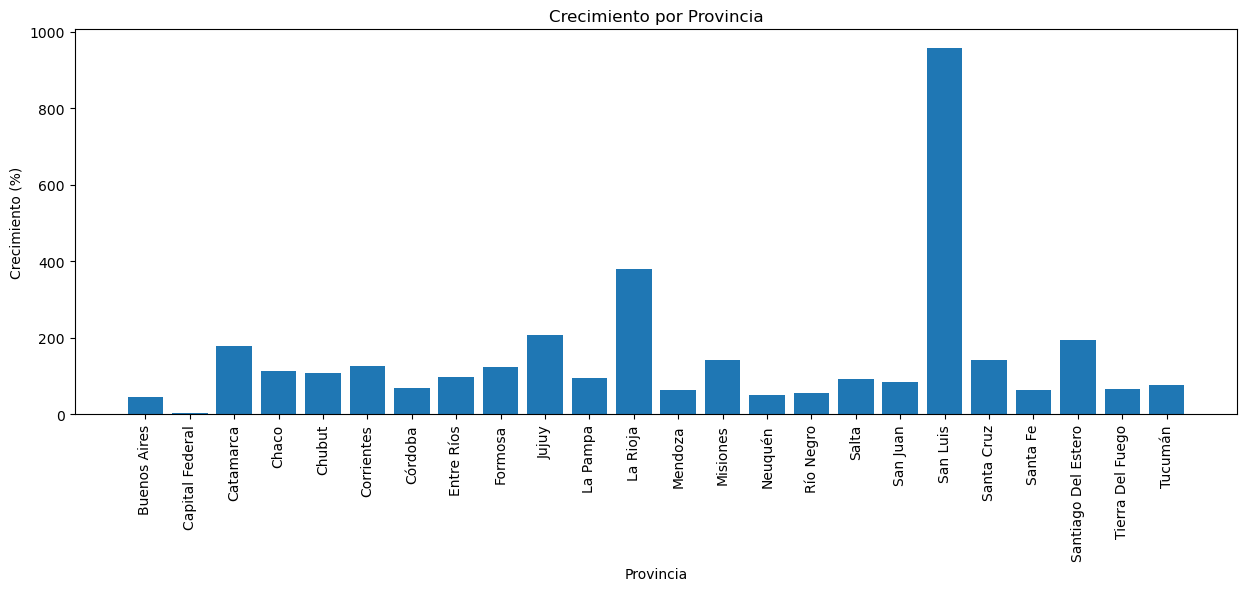

In [16]:
plt.figure(figsize=(15,5))
plt.bar(dictCrecimientoProvincias.keys(), dictCrecimientoProvincias.values())
plt.title('Crecimiento por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=90)
plt.show()

Revisar en detalle el crecmiento de San Luis

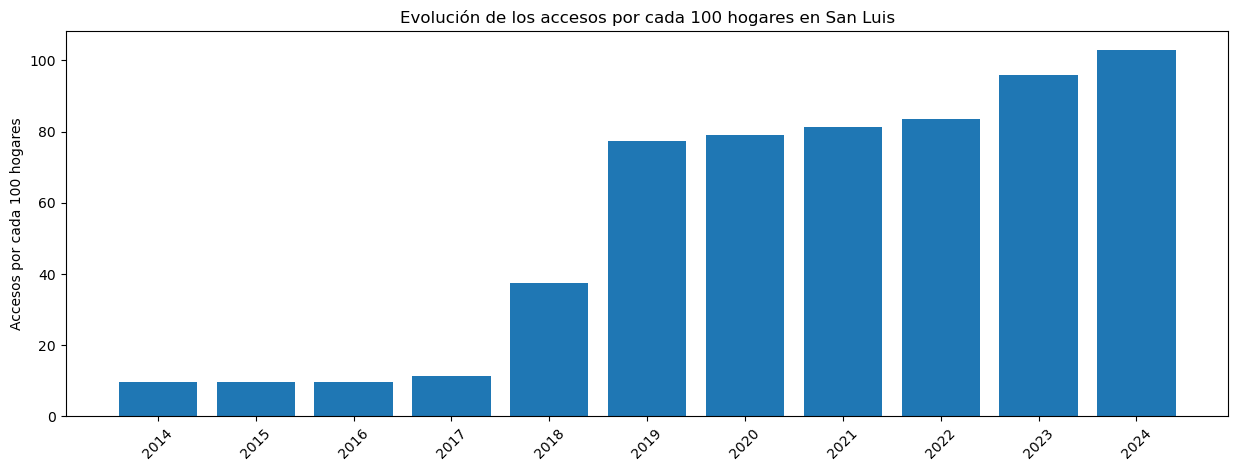

Crecimiento entre 2017 y 2019: 585.46%


In [17]:
dfSanLuis = dfPenetracionHogaresAnualProvincia[dfPenetracionHogaresAnualProvincia['Provincia']=='San Luis'].set_index('Año')
dfSanLuis.head()

plt.figure(figsize=(15,5))
plt.bar(dfSanLuis.index, dfSanLuis['Accesos por cada 100 hogares'])
plt.xticks(dfSanLuis.index, rotation=45)
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Evolución de los accesos por cada 100 hogares en San Luis')
plt.show()

# Calcular el crecimiento entre 2017 y 2019
valor_2017 = dfSanLuis.loc[2017, 'Accesos por cada 100 hogares']
valor_2019 = dfSanLuis.loc[2019, 'Accesos por cada 100 hogares']

crecimiento = (valor_2019 - valor_2017) / valor_2017 * 100
print(f'Crecimiento entre 2017 y 2019: {crecimiento:.2f}%')

### Análisis de penetración de usuarios

In [18]:
# Cargar una hoja específica
dfPenetracionUsuarios = pd.read_excel(file_path, sheet_name='Penetración-poblacion')

print(dfPenetracionUsuarios.head())

    Año  Trimestre        Provincia  Accesos por cada 100 hab
0  2024          2     Buenos Aires                     27.43
1  2024          2  Capital Federal                     47.44
2  2024          2        Catamarca                     17.50
3  2024          2            Chaco                     11.78
4  2024          2           Chubut                     26.46


In [19]:
# Funciones de limpieza de datos

info(dfPenetracionUsuarios)
checkNulls(dfPenetracionUsuarios)
checkDuplicates(dfPenetracionUsuarios)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       1000 non-null   int64  
 1   Trimestre                 1000 non-null   int64  
 2   Provincia                 1000 non-null   object 
 3   Accesos por cada 100 hab  1000 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
               Año    Trimestre  Accesos por cada 100 hab
count  1000.000000  1000.000000               1000.000000
mean   2018.800000     2.464000                 15.727248
std       3.021445     1.114426                  9.240063
min    2014.000000     1.000000                  2.723000
25%    2016.000000     1.000000                  9.018188
50%    2019.000000     2.000000                 13.674812
75%    2021.000000     3.000000                 20.323973
max    2024.000000     4.000000  

In [20]:
#Dataframe de hogares agrupados por provincia y por año
dfPenetracionUsuariosAnualProvincia = dfPenetracionUsuarios.groupby(['Año', 'Provincia'])['Accesos por cada 100 hab'].mean().round(2).reset_index()
dfPenetracionUsuariosAnualProvincia.head()

,Año,Provincia,Accesos por cada 100 hab
0,2014,Buenos Aires,16.94
1,2014,Capital Federal,43.11
2,2014,Catamarca,6.30
3,2014,Chaco,5.65
4,2014,Chubut,12.50


In [21]:
# Crear diccionario con cada provincia y sus valores
dictProvinciasValoreUsuarios = dfPenetracionUsuariosAnualProvincia.groupby('Provincia')['Accesos por cada 100 hab'].apply(list).to_dict()

# Función para calcular el porcentaje de crecimiento
def calcular_crecimiento(lista):
    return round((lista[-1] - lista[0]) / lista[0] * 100, 2)

# Crear un nuevo diccionario con los porcentajes de crecimiento
dictCrecimientoProvinciasUsuarios = {
    provincia: calcular_crecimiento(valores) for provincia, valores in dictProvinciasValoreUsuarios.items()
}

print(dictCrecimientoProvinciasUsuarios)


{'Buenos Aires': 63.05, 'Capital Federal': 11.6, 'Catamarca': 177.78, 'Chaco': 114.69, 'Chubut': 109.92, 'Corrientes': 126.67, 'Córdoba': 69.08, 'Entre Ríos': 97.13, 'Formosa': 124.72, 'Jujuy': 209.39, 'La Pampa': 96.8, 'La Rioja': 381.63, 'Mendoza': 62.85, 'Misiones': 143.21, 'Neuquén': 51.45, 'Río Negro': 56.91, 'Salta': 92.34, 'San Juan': 84.89, 'San Luis': 960.79, 'Santa Cruz': 142.87, 'Santa Fe': 64.7, 'Santiago Del Estero': 195.67, 'Tierra Del Fuego': 68.28, 'Tucumán': 76.91}


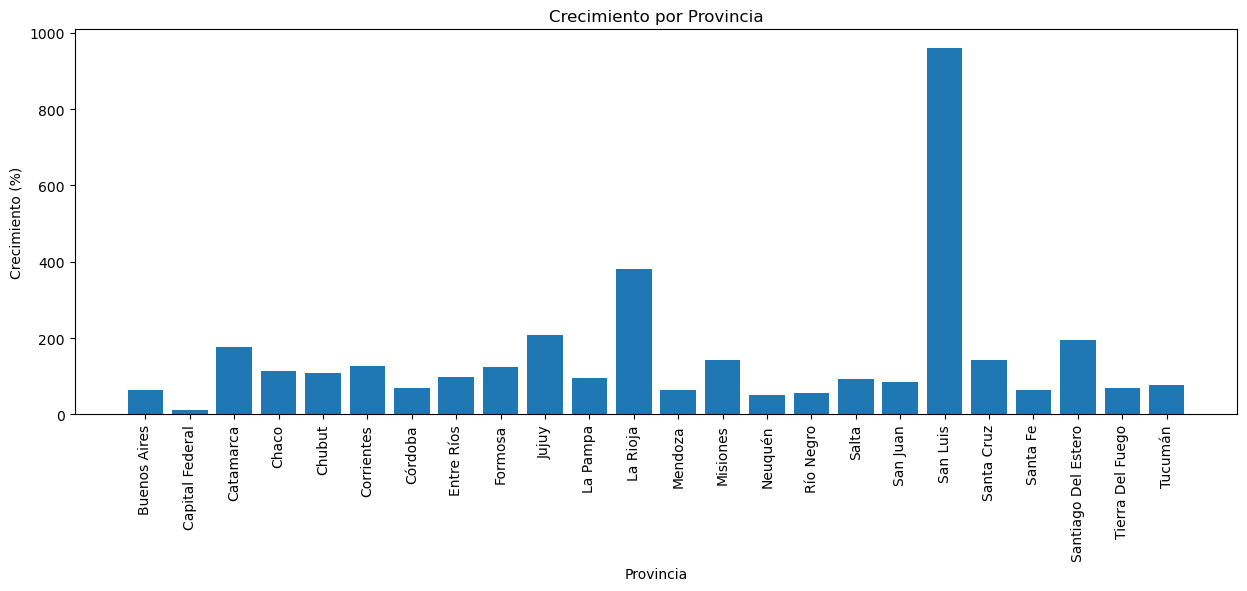

In [22]:
plt.figure(figsize=(15,5))
plt.bar(dictCrecimientoProvinciasUsuarios.keys(), dictCrecimientoProvinciasUsuarios.values())
plt.title('Crecimiento por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Crecimiento (%)')
plt.xticks(rotation=90)
plt.show()

San Luis ha tenido un crecimiento exponencial tanto en el número de accesos por hogar, como en el número de accesos por usuario.

### Análisis de velocidades de acceso

In [23]:
# Cargar una hoja específica
dfVelocidadPais = pd.read_excel(file_path, sheet_name='Totales VMD')

print(dfVelocidadPais.head())

    Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0  2024          2                  139.25   Abr-Jun 2024
1  2024          1                  139.15   Ene-Mar 2024
2  2023          4                  139.04   Oct-Dic 2023
3  2023          3                  129.67  Jul-Sept 2023
4  2023          2                  123.95   Abr-Jun 2023


In [24]:
# Funciones de limpieza de datos

info(dfVelocidadPais)
checkNulls(dfVelocidadPais)
checkDuplicates(dfVelocidadPais)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     42 non-null     int64  
 1   Trimestre               42 non-null     int64  
 2   Mbps (Media de bajada)  42 non-null     float64
 3   Trimestre.1             42 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None
               Año  Trimestre  Mbps (Media de bajada)
count    42.000000  42.000000               42.000000
mean   2018.761905   2.452381               39.334762
std       3.074756   1.130560               43.643195
min    2014.000000   1.000000                3.617127
25%    2016.000000   1.250000                6.038428
50%    2019.000000   2.000000               18.855000
75%    2021.000000   3.000000               51.370000
max    2024.000000   4.000000              139.250000
Año                       0

Detección de outliers

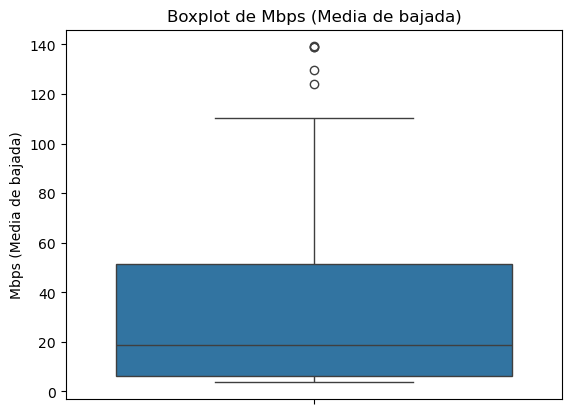

In [25]:
sns.boxplot(data=dfVelocidadPais['Mbps (Media de bajada)'])
plt.title('Boxplot de Mbps (Media de bajada)')
plt.show()

#### Evolución de velocidad de acceso

In [26]:
dfVelocidadPaisAnual = dfVelocidadPais.groupby('Año')['Mbps (Media de bajada)'].mean().reset_index()
dfVelocidadPaisAnual.columns = ['Año', 'Mbps']
dfVelocidadPaisAnual.head()

,Año,Mbps
0,2014,3.849998
1,2015,4.668755
2,2016,5.695848
3,2017,8.532677
4,2018,14.595220


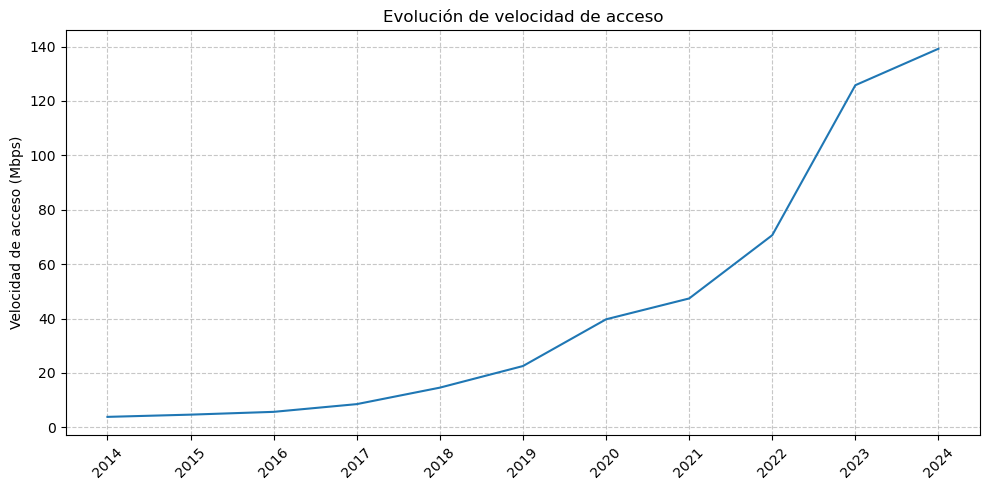

In [27]:
plt.figure(figsize=(10,5))
plt.plot(dfVelocidadPaisAnual['Año'], dfVelocidadPaisAnual['Mbps'], label='Velocity')
plt.xticks(dfVelocidadPaisAnual['Año'], rotation=45)
plt.ylabel('Velocidad de acceso (Mbps)')
plt.title('Evolución de velocidad de acceso')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Filtrar los valores correspondientes a 2014 y 2024
valor_inicial = dfVelocidadPaisAnual[dfVelocidadPaisAnual['Año'] == 2014]['Mbps'].values[0]
valor_final = dfVelocidadPaisAnual[dfVelocidadPaisAnual['Año'] == 2024]['Mbps'].values[0]

crecimientoVelocidad = round(((valor_final - valor_inicial) / valor_inicial) * 100, 2)

print(f'Media de velocidad en 2014: {round(valor_inicial,2)} Mbps')
print(f'Media de velocidad en 2024: {round(valor_final,2)} Mbps \n')
print(f'Crecimiento total de la velocidad a nivel pais entre 2014 y 2024: {crecimientoVelocidad}%')

Media de velocidad en 2014: 3.85 Mbps
Media de velocidad en 2024: 139.2 Mbps 

Crecimiento total de la velocidad a nivel pais entre 2014 y 2024: 3515.59%


Entre 2014 y 2024, la velocidad promedio de descarga a nivel país experimentó un crecimiento significativo, pasando de 3.85 Mbps en 2014 a 139.2 Mbps en 2024. Este incremento representa un crecimiento total del 3515.59% en una década, reflejando un avance notable en la infraestructura tecnológica y la adopción de tecnologías más modernas como la fibra óptica.

#### Analisis de velocidad por provincia en 2024

In [29]:
# Cargar una hoja específica
dfVelocidadProvincia2024 = pd.read_excel(file_path, sheet_name='Velocidad % por prov')

print(dfVelocidadProvincia2024.head())

    Año  Trimestre        Provincia  Mbps (Media de bajada)
0  2024          2     Buenos Aires                  157.41
1  2024          2  Capital Federal                  233.01
2  2024          2        Catamarca                   97.38
3  2024          2            Chaco                  107.76
4  2024          2           Chubut                   21.67


In [30]:
dfVelocidadProvincia2024 = dfVelocidadProvincia2024[dfVelocidadProvincia2024['Año']==2024]
dfVelocidadProvincia2024.drop(['Año', 'Trimestre'], axis=1, inplace=True)
dfVelocidadProvincia2024.sort_values(by=['Mbps (Media de bajada)'], ascending=False, inplace=True)

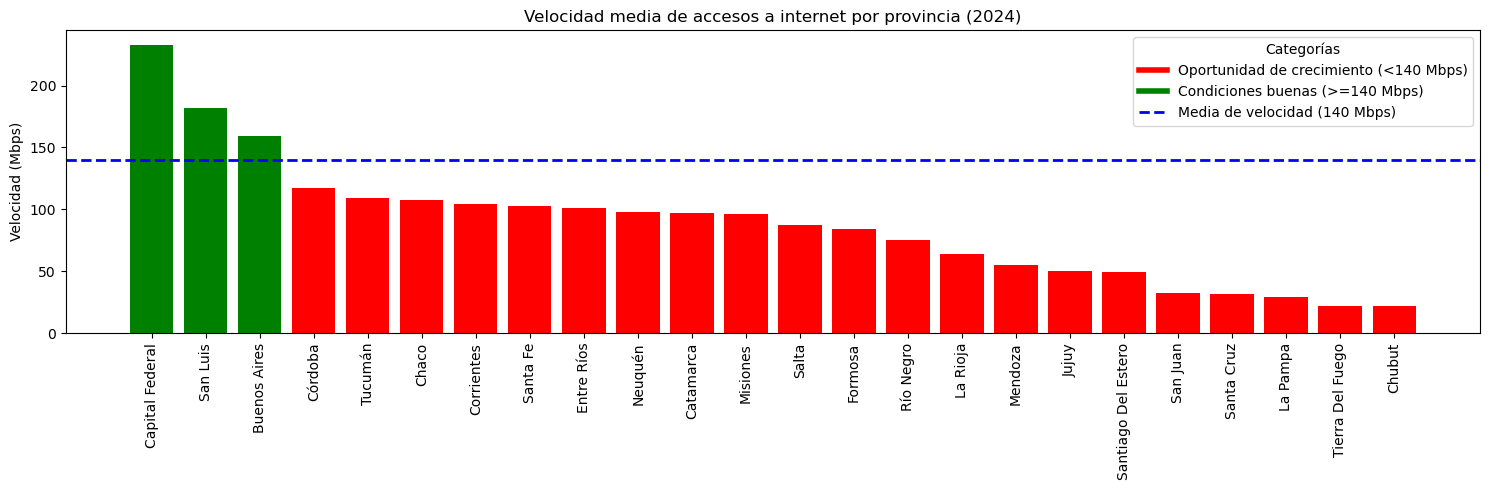

In [31]:
colors = [
    'red' if valor < 140 else 
    'green' 
    for valor in dfVelocidadProvincia2024['Mbps (Media de bajada)']
]

plt.figure(figsize=(15, 5))
plt.bar(
    dfVelocidadProvincia2024['Provincia'], 
    dfVelocidadProvincia2024['Mbps (Media de bajada)'], 
    color=colors
)

plt.title('Velocidad media de accesos a internet por provincia (2024)')
plt.ylabel('Velocidad (Mbps)')
plt.axhline(y=140, color='blue', linestyle='--', linewidth=2, label='Media de velocidad (140 Mbps)')
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label='Oportunidad de crecimiento (<140 Mbps)'),
    Line2D([0], [0], color='green', lw=4, label='Condiciones buenas (>=140 Mbps)'),
    Line2D([0], [0], color='blue', lw=2, linestyle='--', label='Media de velocidad (140 Mbps)')
]
plt.legend(handles=legend_elements, title="Categorías")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Solamente tres provincias se encuentran actualmente por encima de la media de la velocidad del pais

### Análisis de accesos por tecnología

In [32]:
# Cargar una hoja específica
dfAccesosTecnologiaPais = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')

print(dfAccesosTecnologiaPais.head())

    Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2024          2   733491     5867504       4169958    593197  191957   
1  2024          1   774475     5986957       4015101    598682  257941   
2  2023          4   836390     6022532       3908183    585760  194796   
3  2023          3   897895     6018832       3708718    581436  200027   
4  2023          2  1006509     5997149       3463988    581823  202428   

      Total        Periodo  
0  11556107   Abr-Jun 2024  
1  11633156   Ene-Mar 2024  
2  11547661   Oct-Dic 2023  
3  11406908  Jul-Sept 2023  
4  11251897   Abr-Jun 2023  


In [33]:
# Funciones de limpieza de datos

info(dfAccesosTecnologiaPais)
checkNulls(dfAccesosTecnologiaPais)
checkDuplicates(dfAccesosTecnologiaPais)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           42 non-null     int64 
 1   Trimestre     42 non-null     int64 
 2   ADSL          42 non-null     int64 
 3   Cablemodem    42 non-null     int64 
 4   Fibra óptica  42 non-null     int64 
 5   Wireless      42 non-null     int64 
 6   Otros         42 non-null     int64 
 7   Total         42 non-null     int64 
 8   Periodo       42 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.1+ KB
None
               Año  Trimestre          ADSL    Cablemodem  Fibra óptica  \
count    42.000000  42.000000  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2018.761905   2.452381  2.694844e+06  4.433906e+06  1.224694e+06   
std       3.074756   1.130560  1.094347e+06  1.319783e+06  1.321136e+06   
min    2014.000000   1.000000  7.334910e+05  2.407330e+06  1.391870e+05   
25%   

Agrupar por año

In [34]:
dfAccesosTecnologiaPaisAnual = dfAccesosTecnologiaPais.groupby(['Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].mean().round(2)
dfAccesosTecnologiaPaisAnual.head()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
Año,,,,,,
2014,3721187.5,2493771.75,151215.50,76308.50,71675.00,6514158.25
2015,3778923.5,2790742.75,155219.25,82857.75,60711.50,6868454.75
2016,3768453.5,3044272.00,170031.75,84349.00,56908.25,7124014.50
2017,3659825.5,3537015.75,191578.00,108211.00,86040.50,7582670.75
2018,3495496.0,4142818.00,269781.00,217511.75,116440.00,8242046.75


Gráfico de creciento por tecnología

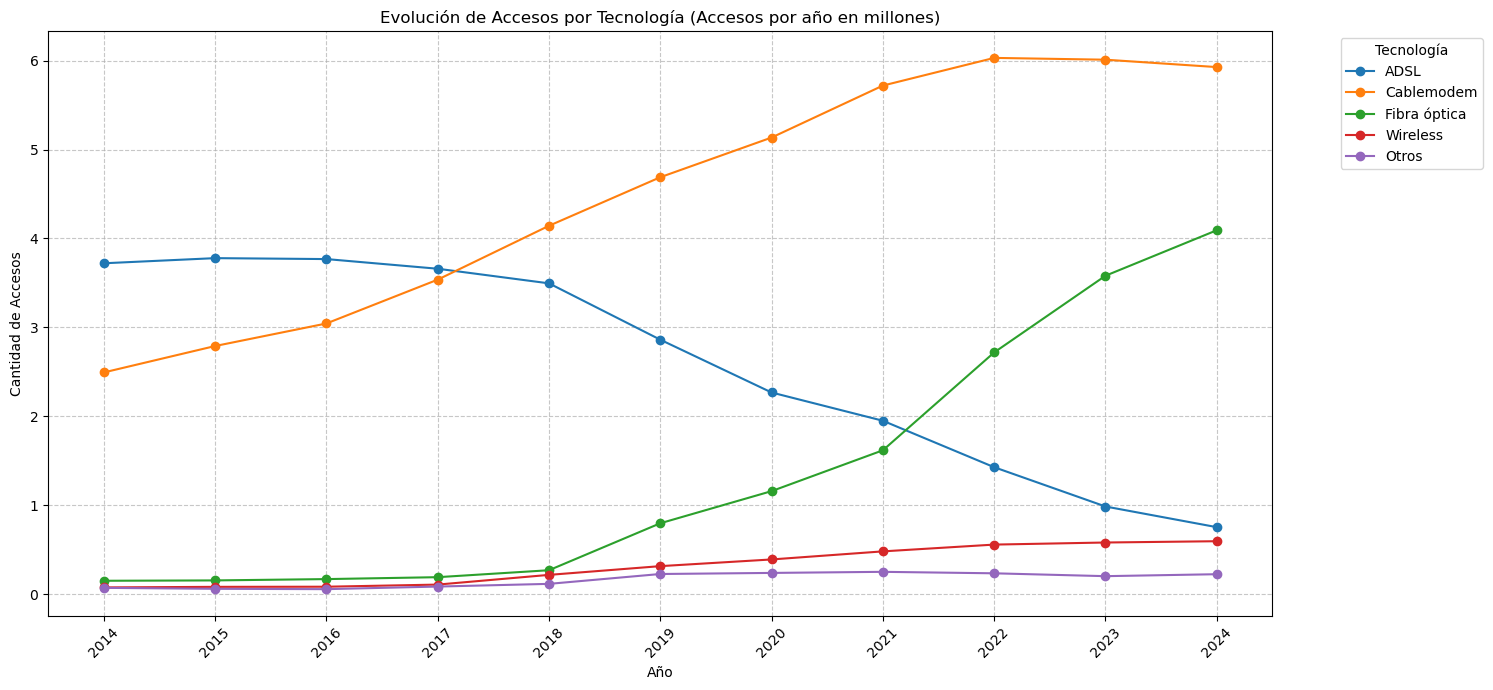

In [35]:
# Columnas seleccionadas
columnasGraficoCrecimientoAnual = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Crear el gráfico
plt.figure(figsize=(15, 7))
for columna in columnasGraficoCrecimientoAnual:
    plt.plot(dfAccesosTecnologiaPaisAnual.index, dfAccesosTecnologiaPaisAnual[columna] / 1e6, label=columna, marker='o')

# Configurar etiquetas, título y leyenda
plt.xticks(dfAccesosTecnologiaPaisAnual.index, rotation=45)
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos')
plt.title('Evolución de Accesos por Tecnología (Accesos por año en millones)')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
def calcular_crecimiento(df, columna, inicio, fin):
    return round((df.loc[fin, columna] - df.loc[inicio, columna]) / df.loc[inicio, columna] * 100, 2)

crecimiento_adsl = calcular_crecimiento(dfAccesosTecnologiaPaisAnual, 'ADSL', 2017, 2024)
crecimiento_cablemodem = calcular_crecimiento(dfAccesosTecnologiaPaisAnual, 'Cablemodem', 2017, 2024)
crecimiento_fibra = calcular_crecimiento(dfAccesosTecnologiaPaisAnual, 'Fibra óptica', 2018, 2024)

print(f'Crecimiento de ADSL: {crecimiento_adsl}%')
print(f'Crecimiento de Cablemodem: {crecimiento_cablemodem}%')
print(f'Crecimiento de Fibra óptica: {crecimiento_fibra}%')                                                                                                                        
    

Crecimiento de ADSL: -79.4%
Crecimiento de Cablemodem: 67.58%
Crecimiento de Fibra óptica: 1416.98%



Entre 2017 y 2024, se observan dinámicas contrastantes en las tecnologías de acceso a internet. El ADSL experimentó una marcada caída de -79.4%, reflejando su desplazamiento como tecnología predominante en favor de opciones más modernas. En contraste, el Cablemodem registró un crecimiento moderado de 67.58%, manteniéndose relevante como una solución ampliamente utilizada. Sin embargo, el cambio más notable se dio en la Fibra óptica, cuyo crecimiento de 1416.98% entre 2018 y 2024 destaca su adopción masiva como la tecnología de preferencia para satisfacer las crecientes demandas de velocidad y calidad en las conexiones a internet.

### Accesos por tecnología por provincia

In [37]:
# Cargar una hoja específica
dfAccesosTecnologiaProvincia = pd.read_excel(file_path, sheet_name='Accesos Por Tecnología')

print(dfAccesosTecnologiaProvincia.head())

    Año  Trimestre        Provincia    ADSL  Cablemodem  Fibra óptica  \
0  2024          2     Buenos Aires  214055     2722466       1849476   
1  2024          2  Capital Federal   54102     1144781        230402   
2  2024          2        Catamarca    4951       10303         58355   
3  2024          2            Chaco    9448       57935         68944   
4  2024          2           Chubut   25955       80704         26516   

   Wireless  Otros    Total  
0    138638  64745  4989380  
1      4493  29821  1463599  
2      1384     81    75074  
3      8407   2358   147092  
4     31118   9930   174223  


In [38]:
# Funciones de limpieza de datos

info(dfAccesosTecnologiaProvincia)
checkNulls(dfAccesosTecnologiaProvincia)
checkDuplicates(dfAccesosTecnologiaProvincia)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           1007 non-null   int64 
 1   Trimestre     1007 non-null   int64 
 2   Provincia     1007 non-null   object
 3   ADSL          1007 non-null   int64 
 4   Cablemodem    1007 non-null   int64 
 5   Fibra óptica  1007 non-null   int64 
 6   Wireless      1007 non-null   int64 
 7   Otros         1007 non-null   int64 
 8   Total         1007 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 70.9+ KB
None
               Año    Trimestre          ADSL    Cablemodem  Fibra óptica  \
count  1007.000000  1007.000000  1.007000e+03  1.007000e+03  1.007000e+03   
mean   2018.756703     2.453823  1.129309e+05  1.821583e+05  4.855699e+04   
std       3.036457     1.117190  2.362922e+05  4.460058e+05  1.758694e+05   
min    2014.000000     1.000000  2.230000e+03  0.000000e+00  0.00000

In [39]:
dfAccesosTecnologiaProvinciaAnual = dfAccesosTecnologiaProvincia.groupby(['Año', 'Provincia'])\
    [['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].mean().round(2).reset_index()
dfAccesosTecnologiaProvinciaAnual.head()

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,Buenos Aires,1568769.25,1051783.00,121492.50,17831.25,32722.50,2792598.50
1,2014,Capital Federal,449786.50,830549.50,17634.25,1926.50,14722.75,1314619.50
2,2014,Catamarca,24519.50,193.50,16.25,0.00,44.25,24773.50
3,2014,Chaco,53659.25,10155.25,30.00,0.25,59.25,63904.00
4,2014,Chubut,49973.50,638.25,876.25,11461.25,6655.50,69604.75


In [40]:
# Lista de provincias
provincias = dfAccesosTecnologiaProvinciaAnual['Provincia'].unique()
print(provincias)

['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut'
 'Corrientes' 'Córdoba' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero'
 'Tierra Del Fuego' 'Tucumán']


In [41]:
conclusionesGraficosProvincias = {
    'Buenos Aires': 'En Buenos Aires, el dominio de Cablemodem y Fibra óptica es notable, siendo estas las tecnologías principales. A partir de 2016, se observa una disminución sostenida en el uso de ADSL, lo cual es un indicador claro de la transición hacia tecnologías más modernas y de mayor capacidad. El uso de Cablemodem ha sido constante, aunque la Fibra óptica ha crecido exponencialmente desde 2018, posicionándose como la tecnología preferida en varias localidades de la provincia. Wireless también muestra un crecimiento, pero sigue estando por debajo de las otras tecnologías.',
    'Capital Federal': 'En Capital Federal, se observa un claro dominio de Cablemodem sobre las demás tecnologías, especialmente desde 2015. La disminución del uso de ADSL comenzó en 2017 y ha sido continua, lo que indica una modernización en el acceso a internet en esta región. Fibra óptica ha mostrado un crecimiento constante desde 2019, alcanzando niveles comparables al uso de Cablemodem en los últimos años. Wireless tiene una participación menor, pero ha tenido un crecimiento sostenido en las zonas donde el acceso a Cablemodem o Fibra óptica es menos eficiente.',
    'Catamarca': 'En Catamarca, se observa un cambio abrupto a partir de 2021, con un aumento exponencial en el uso de Fibra óptica, que coincide con la caída en el uso de ADSL. A pesar de que Cablemodem tuvo una recuperación en ese periodo, se observa un estancamiento en su uso en comparación con los períodos anteriores a 2020.',
    'Chaco': 'En Chaco, 2019 es el año que marca la diferencia, iniciándose un crecimiento acelerado en el uso de Fibra óptica, así como una aceleración en el desuso de ADSL. En cuanto a Cablemodem, el crecimiento sostenido desde 2014 se mantuvo hasta 2021, cuando comienza una leve caída.',
    'Chubut': 'Para Chubut, es importante destacar el crecimiento sostenido en el uso de Cablemodem desde 2016 hasta la actualidad, superando el uso inestable de ADSL en la zona. Otro factor importante es el crecimiento gradual del uso de Wireless y Fibra óptica, alcanzando niveles similares en el caso de Fibra y superiores en el caso de Wireless respecto al uso actual de ADSL. En cuanto a otras tecnologías, se observa un pico anormal de uso en 2019; sin embargo, esto se considera una excepción y no la regla.',
    'Corrientes': 'Corrientes presenta un desuso de ADSL desde 2018 y un crecimiento acelerado del uso de Cablemodem desde 2014. Se observa que en 2019 se igualan los niveles en estas tecnologías y luego se invierte la tendencia, pasando a ser dominante el uso de Cablemodem. La Fibra óptica aparece como una opción alternativa desde 2019, superando al acceso mediante ADSL entre 2022 y 2023.',
    'Córdoba': 'Para Córdoba, ADSL y Cablemodem alcanzan niveles similares en 2018, pasando Cablemodem a ser la tecnología dominante. El uso de ADSL también disminuye significativamente a partir de entonces. El uso de Fibra óptica crece exponencialmente a partir de 2019, superando a Cablemodem en 2024.',
    'Entre Ríos': 'En Entre Ríos, se observa una disminución en el uso de ADSL desde 2017. Cablemodem mantiene un crecimiento moderado, mientras que la Fibra óptica comienza a ganar terreno significativamente a partir de 2020, lo cual indica una transición hacia tecnologías más modernas.',
    'Formosa': 'Formosa muestra un crecimiento notable en el uso de Wireless debido a la limitada infraestructura de fibra óptica. ADSL ha disminuido, mientras que la Fibra óptica comienza a establecerse como una opción preferida a partir de 2021.',
    'Jujuy': 'En Jujuy, el uso de ADSL está en declive mientras que la Fibra óptica y Wireless muestran un crecimiento constante desde 2019, reflejando un cambio hacia tecnologías más avanzadas.',
    'La Pampa': 'La Pampa presenta un crecimiento diversificado en varias tecnologías, destacándose Wireless y Cablemodem, que han crecido de manera constante desde 2018, mientras que el uso de ADSL se ha reducido significativamente.',
    'La Rioja': 'En La Rioja, la Fibra óptica muestra un crecimiento acelerado a partir de 2021, mientras que ADSL y Cablemodem presentan una tendencia a la baja, lo cual refleja un reemplazo por tecnologías más modernas.',
    'Mendoza': 'Mendoza sigue la tendencia nacional con un crecimiento sostenido en el uso de Fibra óptica a partir de 2020, mientras que ADSL ha ido disminuyendo significativamente desde 2017. Cablemodem se mantiene como una opción relevante pero estable.',
    'Misiones': 'Misiones presenta un crecimiento acelerado de Fibra óptica desde 2021, acompañado por una caída en el uso de ADSL. Cablemodem también ha mostrado un comportamiento estable, aunque sin el crecimiento exponencial de la fibra.',
    'Neuquén': 'En Neuquén, se observa un crecimiento significativo en el uso de Fibra óptica desde 2019. ADSL y Wireless están en disminución, mientras que Cablemodem mantiene su relevancia.',
    'Río Negro': 'Río Negro muestra una reducción en el uso de ADSL y un crecimiento notable en el uso de Fibra óptica y Wireless desde 2020, indicando una transición hacia estas tecnologías.',
    'Salta': 'En Salta, se registra una disminución constante en el uso de ADSL y un crecimiento significativo en el uso de Fibra óptica a partir de 2021, mientras que Cablemodem mantiene un uso estable.',
    'San Juan': 'San Juan muestra un crecimiento significativo en el uso de Fibra óptica y una disminución en ADSL. Cablemodem sigue siendo una tecnología relevante, aunque el crecimiento de la fibra ha sido más notorio.',
    'San Luis': 'San Luis muestra un crecimiento impresionante en el uso de Wireless, lo cual se refleja en la mayor adopción respecto a otras tecnologías. ADSL está en fuerte declive mientras que la Fibra óptica ha comenzado a establecerse como una opción más viable.',
    'Santa Cruz': 'Santa Cruz presenta un crecimiento notable de Fibra óptica desde 2020, acompañado de una caída en ADSL. Wireless sigue siendo importante, aunque el crecimiento de la fibra destaca en la región.',
    'Santa Fe': 'Santa Fe tiene un uso estable de Cablemodem, pero el crecimiento más significativo se ha dado en el uso de Fibra óptica desde 2019, que ahora está en niveles comparables o superiores al de Cablemodem.',
    'Santiago Del Estero': 'En Santiago Del Estero, se destaca el crecimiento de Wireless como la tecnología más utilizada, debido a la baja infraestructura de fibra óptica. ADSL ha disminuido, mientras que la Fibra óptica muestra un crecimiento moderado.',
    'Tierra Del Fuego': 'En Tierra del Fuego, Cablemodem domina el acceso a internet, mientras que la Fibra óptica ha ido creciendo desde 2020. ADSL está en declive y Wireless tiene una participación limitada.',
    'Tucumán': 'En Tucumán, se observa una disminución en el uso de ADSL y un crecimiento considerable en el uso de Fibra óptica desde 2021. Cablemodem mantiene una presencia importante pero estable en comparación con la fibra.'
}


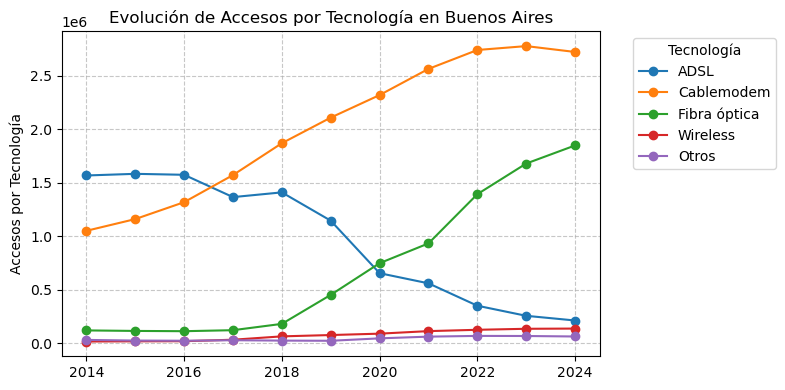

Provincia: Buenos Aires, 
Conclusión: En Buenos Aires, el dominio de Cablemodem y Fibra óptica es notable, siendo estas las tecnologías principales. A partir de 2016, se observa una disminución sostenida en el uso de ADSL, lo cual es un indicador claro de la transición hacia tecnologías más modernas y de mayor capacidad. El uso de Cablemodem ha sido constante, aunque la Fibra óptica ha crecido exponencialmente desde 2018, posicionándose como la tecnología preferida en varias localidades de la provincia. Wireless también muestra un crecimiento, pero sigue estando por debajo de las otras tecnologías.


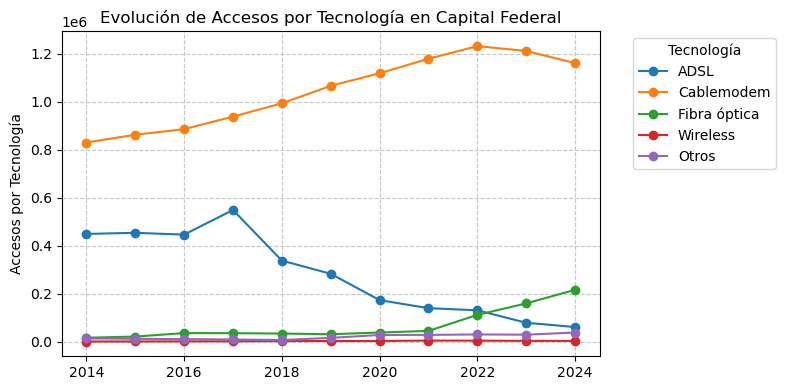

Provincia: Capital Federal, 
Conclusión: En Capital Federal, se observa un claro dominio de Cablemodem sobre las demás tecnologías, especialmente desde 2015. La disminución del uso de ADSL comenzó en 2017 y ha sido continua, lo que indica una modernización en el acceso a internet en esta región. Fibra óptica ha mostrado un crecimiento constante desde 2019, alcanzando niveles comparables al uso de Cablemodem en los últimos años. Wireless tiene una participación menor, pero ha tenido un crecimiento sostenido en las zonas donde el acceso a Cablemodem o Fibra óptica es menos eficiente.


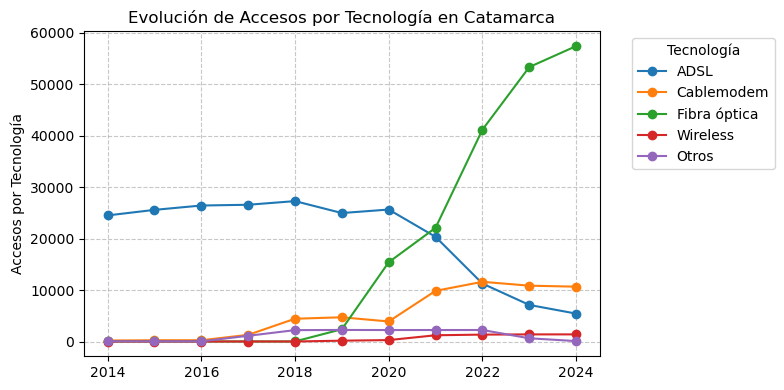

Provincia: Catamarca, 
Conclusión: En Catamarca, se observa un cambio abrupto a partir de 2021, con un aumento exponencial en el uso de Fibra óptica, que coincide con la caída en el uso de ADSL. A pesar de que Cablemodem tuvo una recuperación en ese periodo, se observa un estancamiento en su uso en comparación con los períodos anteriores a 2020.


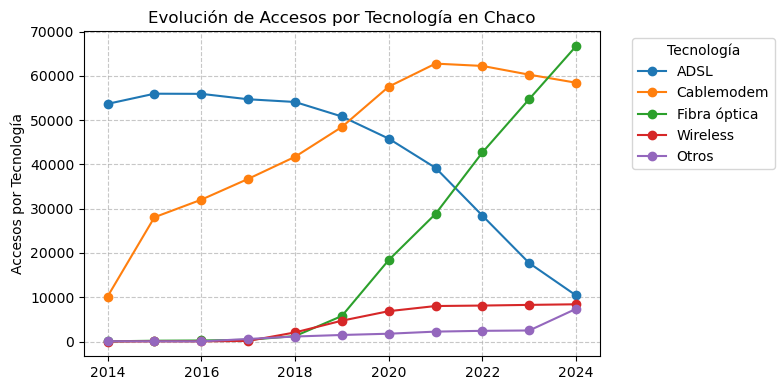

Provincia: Chaco, 
Conclusión: En Chaco, 2019 es el año que marca la diferencia, iniciándose un crecimiento acelerado en el uso de Fibra óptica, así como una aceleración en el desuso de ADSL. En cuanto a Cablemodem, el crecimiento sostenido desde 2014 se mantuvo hasta 2021, cuando comienza una leve caída.


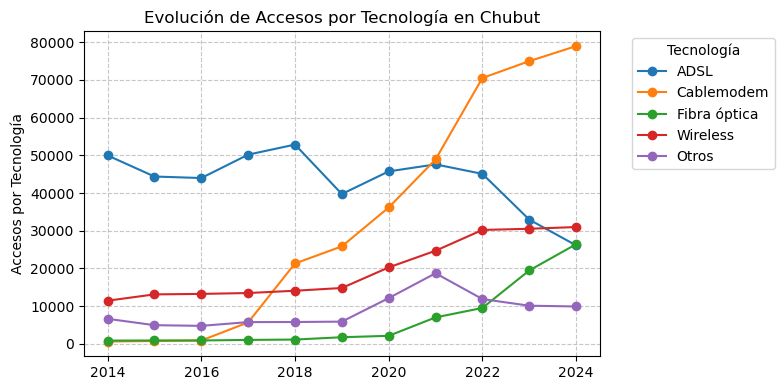

Provincia: Chubut, 
Conclusión: Para Chubut, es importante destacar el crecimiento sostenido en el uso de Cablemodem desde 2016 hasta la actualidad, superando el uso inestable de ADSL en la zona. Otro factor importante es el crecimiento gradual del uso de Wireless y Fibra óptica, alcanzando niveles similares en el caso de Fibra y superiores en el caso de Wireless respecto al uso actual de ADSL. En cuanto a otras tecnologías, se observa un pico anormal de uso en 2019; sin embargo, esto se considera una excepción y no la regla.


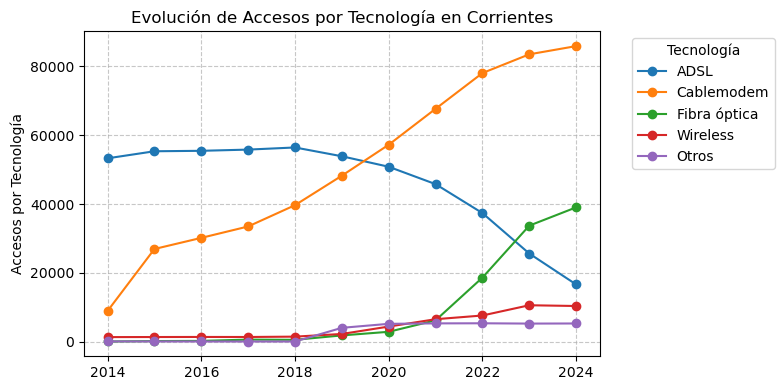

Provincia: Corrientes, 
Conclusión: Corrientes presenta un desuso de ADSL desde 2018 y un crecimiento acelerado del uso de Cablemodem desde 2014. Se observa que en 2019 se igualan los niveles en estas tecnologías y luego se invierte la tendencia, pasando a ser dominante el uso de Cablemodem. La Fibra óptica aparece como una opción alternativa desde 2019, superando al acceso mediante ADSL entre 2022 y 2023.


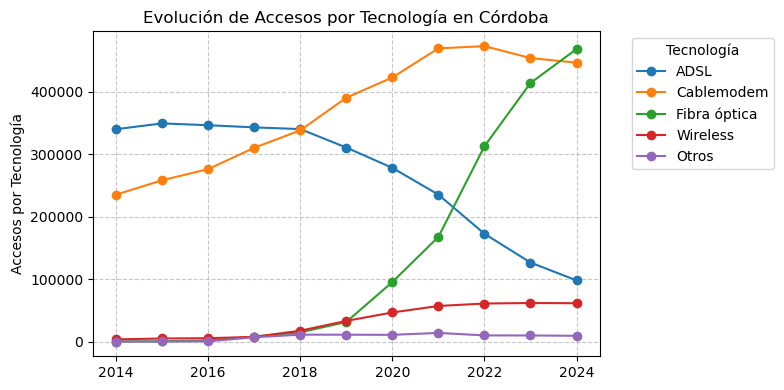

Provincia: Córdoba, 
Conclusión: Para Córdoba, ADSL y Cablemodem alcanzan niveles similares en 2018, pasando Cablemodem a ser la tecnología dominante. El uso de ADSL también disminuye significativamente a partir de entonces. El uso de Fibra óptica crece exponencialmente a partir de 2019, superando a Cablemodem en 2024.


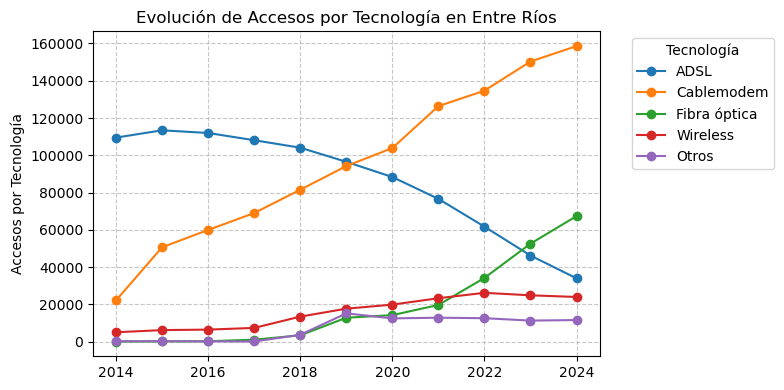

Provincia: Entre Ríos, 
Conclusión: En Entre Ríos, se observa una disminución en el uso de ADSL desde 2017. Cablemodem mantiene un crecimiento moderado, mientras que la Fibra óptica comienza a ganar terreno significativamente a partir de 2020, lo cual indica una transición hacia tecnologías más modernas.


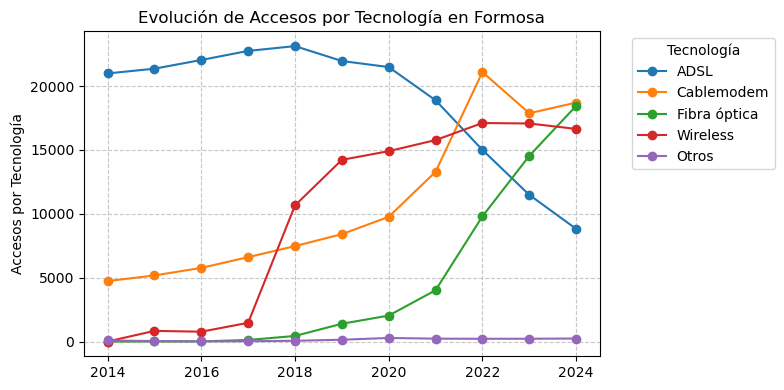

Provincia: Formosa, 
Conclusión: Formosa muestra un crecimiento notable en el uso de Wireless debido a la limitada infraestructura de fibra óptica. ADSL ha disminuido, mientras que la Fibra óptica comienza a establecerse como una opción preferida a partir de 2021.


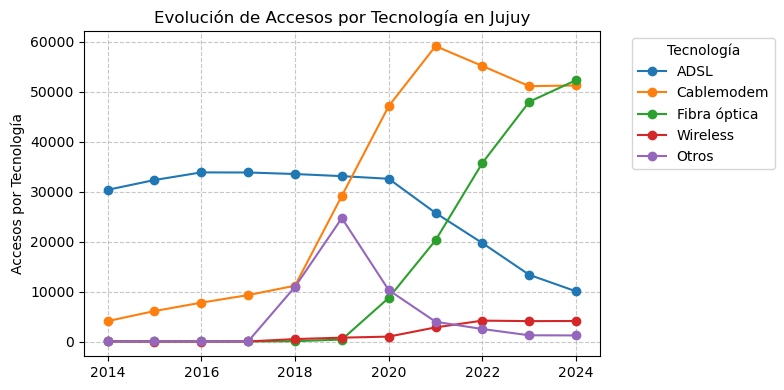

Provincia: Jujuy, 
Conclusión: En Jujuy, el uso de ADSL está en declive mientras que la Fibra óptica y Wireless muestran un crecimiento constante desde 2019, reflejando un cambio hacia tecnologías más avanzadas.


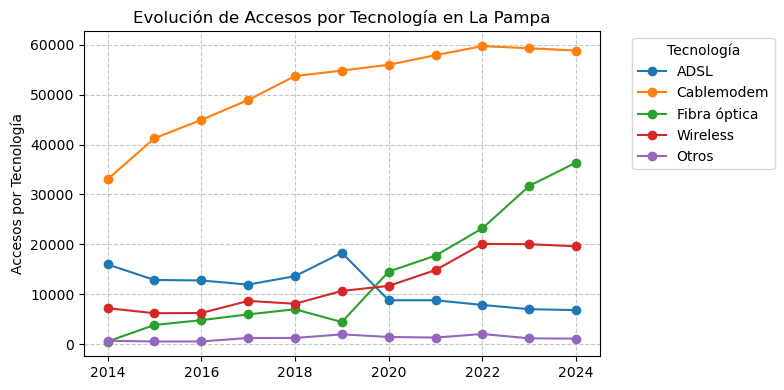

Provincia: La Pampa, 
Conclusión: La Pampa presenta un crecimiento diversificado en varias tecnologías, destacándose Wireless y Cablemodem, que han crecido de manera constante desde 2018, mientras que el uso de ADSL se ha reducido significativamente.


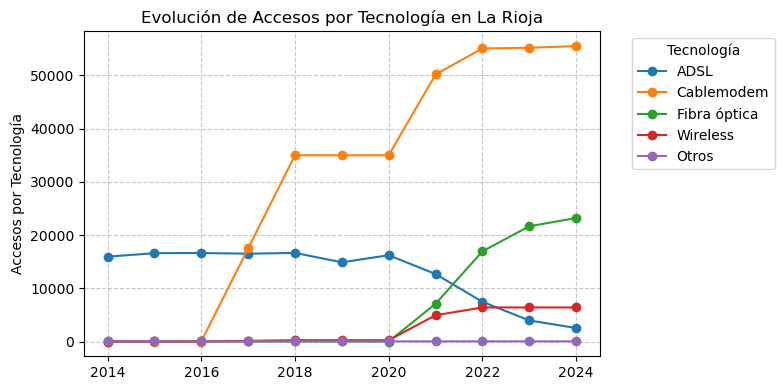

Provincia: La Rioja, 
Conclusión: En La Rioja, la Fibra óptica muestra un crecimiento acelerado a partir de 2021, mientras que ADSL y Cablemodem presentan una tendencia a la baja, lo cual refleja un reemplazo por tecnologías más modernas.


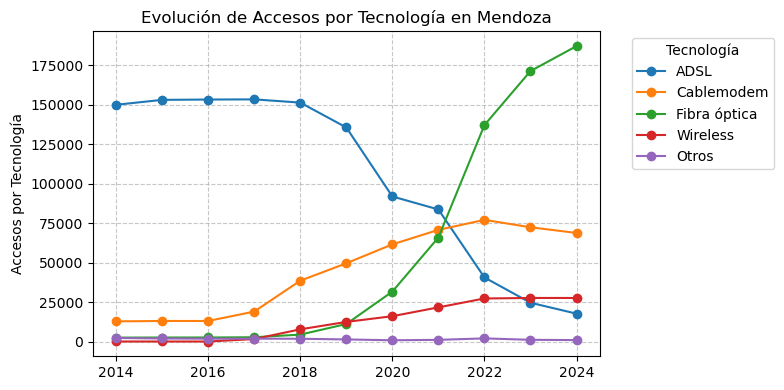

Provincia: Mendoza, 
Conclusión: Mendoza sigue la tendencia nacional con un crecimiento sostenido en el uso de Fibra óptica a partir de 2020, mientras que ADSL ha ido disminuyendo significativamente desde 2017. Cablemodem se mantiene como una opción relevante pero estable.


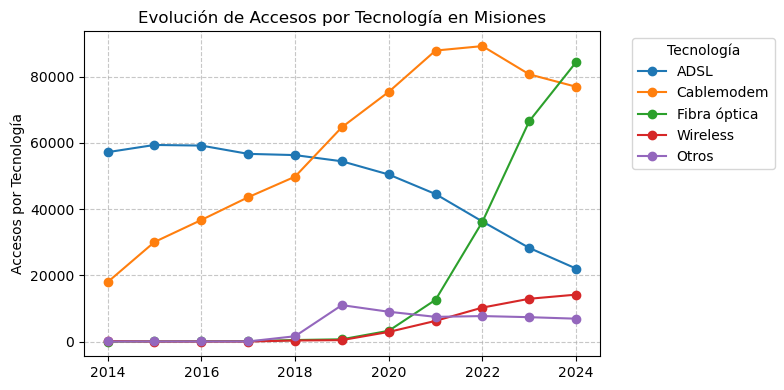

Provincia: Misiones, 
Conclusión: Misiones presenta un crecimiento acelerado de Fibra óptica desde 2021, acompañado por una caída en el uso de ADSL. Cablemodem también ha mostrado un comportamiento estable, aunque sin el crecimiento exponencial de la fibra.


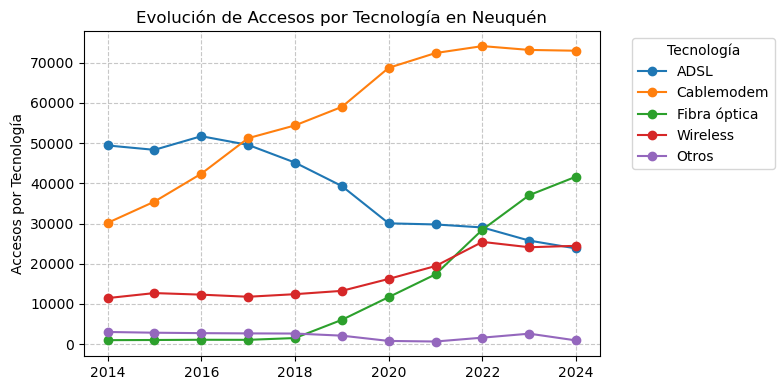

Provincia: Neuquén, 
Conclusión: En Neuquén, se observa un crecimiento significativo en el uso de Fibra óptica desde 2019. ADSL y Wireless están en disminución, mientras que Cablemodem mantiene su relevancia.


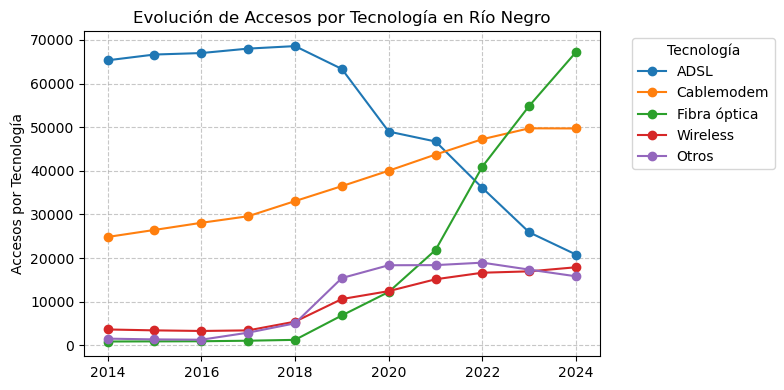

Provincia: Río Negro, 
Conclusión: Río Negro muestra una reducción en el uso de ADSL y un crecimiento notable en el uso de Fibra óptica y Wireless desde 2020, indicando una transición hacia estas tecnologías.


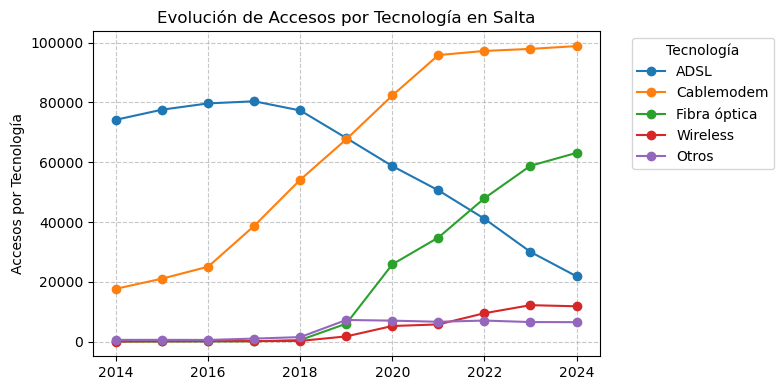

Provincia: Salta, 
Conclusión: En Salta, se registra una disminución constante en el uso de ADSL y un crecimiento significativo en el uso de Fibra óptica a partir de 2021, mientras que Cablemodem mantiene un uso estable.


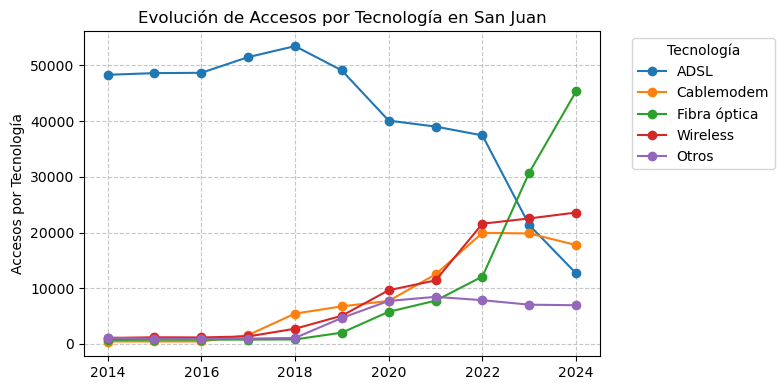

Provincia: San Juan, 
Conclusión: San Juan muestra un crecimiento significativo en el uso de Fibra óptica y una disminución en ADSL. Cablemodem sigue siendo una tecnología relevante, aunque el crecimiento de la fibra ha sido más notorio.


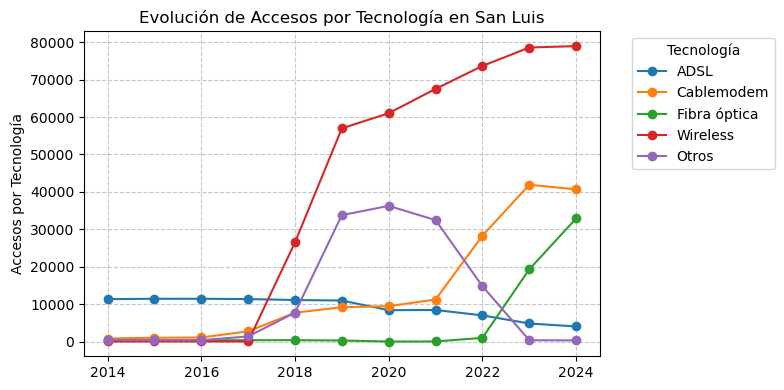

Provincia: San Luis, 
Conclusión: San Luis muestra un crecimiento impresionante en el uso de Wireless, lo cual se refleja en la mayor adopción respecto a otras tecnologías. ADSL está en fuerte declive mientras que la Fibra óptica ha comenzado a establecerse como una opción más viable.


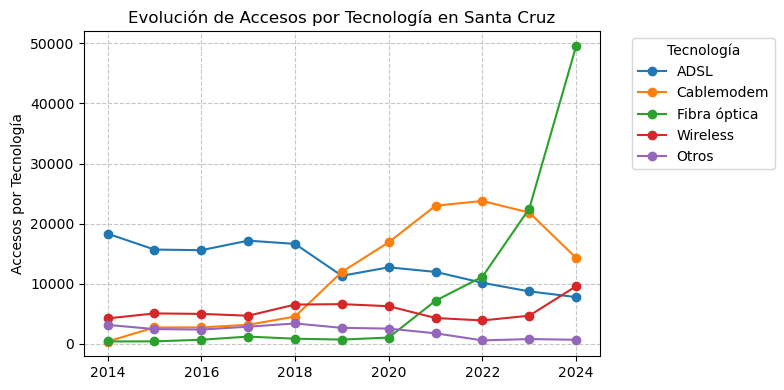

Provincia: Santa Cruz, 
Conclusión: Santa Cruz presenta un crecimiento notable de Fibra óptica desde 2020, acompañado de una caída en ADSL. Wireless sigue siendo importante, aunque el crecimiento de la fibra destaca en la región.


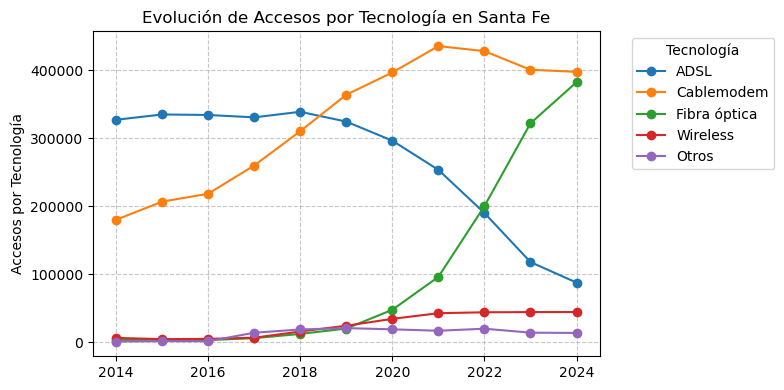

Provincia: Santa Fe, 
Conclusión: Santa Fe tiene un uso estable de Cablemodem, pero el crecimiento más significativo se ha dado en el uso de Fibra óptica desde 2019, que ahora está en niveles comparables o superiores al de Cablemodem.


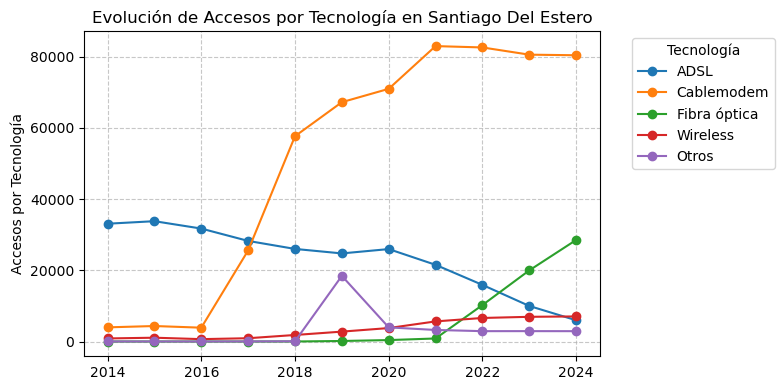

Provincia: Santiago Del Estero, 
Conclusión: En Santiago Del Estero, se destaca el crecimiento de Wireless como la tecnología más utilizada, debido a la baja infraestructura de fibra óptica. ADSL ha disminuido, mientras que la Fibra óptica muestra un crecimiento moderado.


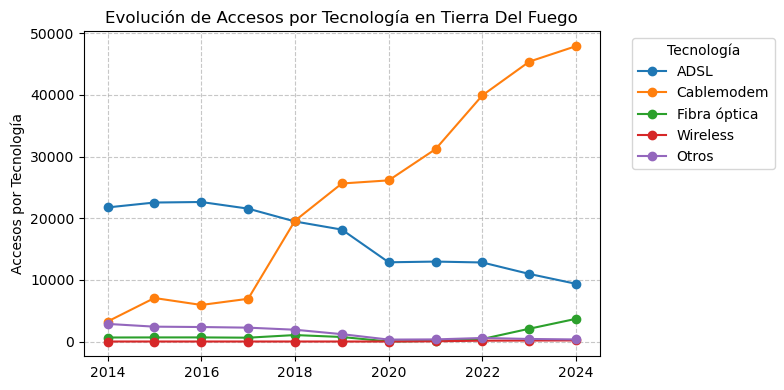

Provincia: Tierra Del Fuego, 
Conclusión: En Tierra del Fuego, Cablemodem domina el acceso a internet, mientras que la Fibra óptica ha ido creciendo desde 2020. ADSL está en declive y Wireless tiene una participación limitada.


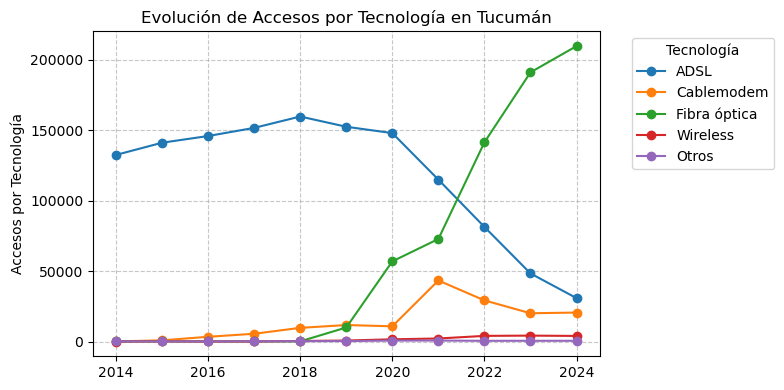

Provincia: Tucumán, 
Conclusión: En Tucumán, se observa una disminución en el uso de ADSL y un crecimiento considerable en el uso de Fibra óptica desde 2021. Cablemodem mantiene una presencia importante pero estable en comparación con la fibra.


In [42]:
# Crear un gráfico por provincia
columnas_tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']


for provincia in provincias:
    # Filtrar datos para la provincia actual
    df_provincia = dfAccesosTecnologiaProvinciaAnual[dfAccesosTecnologiaProvinciaAnual['Provincia'] == provincia]
    
    # Crear el gráfico
    plt.figure(figsize=(8, 4))
    for tecnologia in columnas_tecnologias:
        plt.plot(df_provincia['Año'], df_provincia[tecnologia], label=tecnologia, marker='o')
    
    # Configurar etiquetas, título y leyenda
    plt.ylabel('Accesos por Tecnología')
    plt.title(f'Evolución de Accesos por Tecnología en {provincia}')
    plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    conclusion = conclusionesGraficosProvincias.get(provincia, "Conclusión no disponible")
    print(f"Provincia: {provincia}, \nConclusión: {conclusion}")

### Insights Clave
- #### Crecimiento Desigual por Tecnología:

Fibra óptica muestra un crecimiento significativo en casi todas las provincias, consolidándose como la tecnología predominante para nuevas instalaciones de internet.
ADSL está en un claro declive en la mayoría de las provincias, reflejando un reemplazo por tecnologías más avanzadas.

- #### Tendencias Regionales:

Provincias más urbanizadas como Buenos Aires y Capital Federal presentan un uso predominante de Cablemodem y Fibra óptica, alineándose con la infraestructura disponible.
En provincias más rurales, como Chaco y Formosa, Wireless juega un papel importante debido a la limitada cobertura de fibra óptica.

- #### Desempeño de Tecnologías Tradicionales:

Cablemodem se mantiene relevante en provincias como Santa Fe y Mendoza, aunque con un crecimiento más moderado en comparación con la fibra óptica.

- #### Penetración Baja de Tecnologías Alternativas:

Las tecnologías etiquetadas como "Otros" muestran una penetración muy baja en todas las provincias, indicando que no han logrado una adopción significativa.

- #### Accesos por Región:

Las provincias con mayor población, como Buenos Aires, destacan por una adopción mucho más acelerada en todas las tecnologías.

- #### Retos para la Equidad Año:

Existe una brecha tecnológica considerable entre provincias con alto acceso a tecnologías avanzadas y otras con predominancia de tecnologías tradicionales como ADSL y Wireless.

### Analisis relativo del acceso por tecnologías por provincia

In [43]:
dfAccesosTecnologiaProvincia2024 = dfAccesosTecnologiaProvinciaAnual[dfAccesosTecnologiaProvinciaAnual['Año'] == 2024]

# Crear una pivot table
pivot_table = dfAccesosTecnologiaProvincia2024.pivot_table(
    index=['Provincia'],
    values=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
)

# Convertir los valores a porcentajes relativos
pivot_table_relative = round(pivot_table.div(pivot_table['Total'], axis=0) * 100, 2)
pivot_table_relative.drop(columns=['Total'], inplace=True)
pivot_table_relative.sort_values(by=['Fibra óptica'], inplace=True), 

pivot_table_relative.head()

,ADSL,Cablemodem,Fibra óptica,Otros,Wireless
Provincia,,,,,
Tierra Del Fuego,15.22,77.96,5.99,0.54,0.29
Capital Federal,4.18,78.23,14.63,2.65,0.30
Chubut,15.15,45.79,15.33,5.76,17.97
San Luis,2.57,25.92,20.97,0.19,50.34
Entre Ríos,11.49,53.68,22.80,3.91,8.11


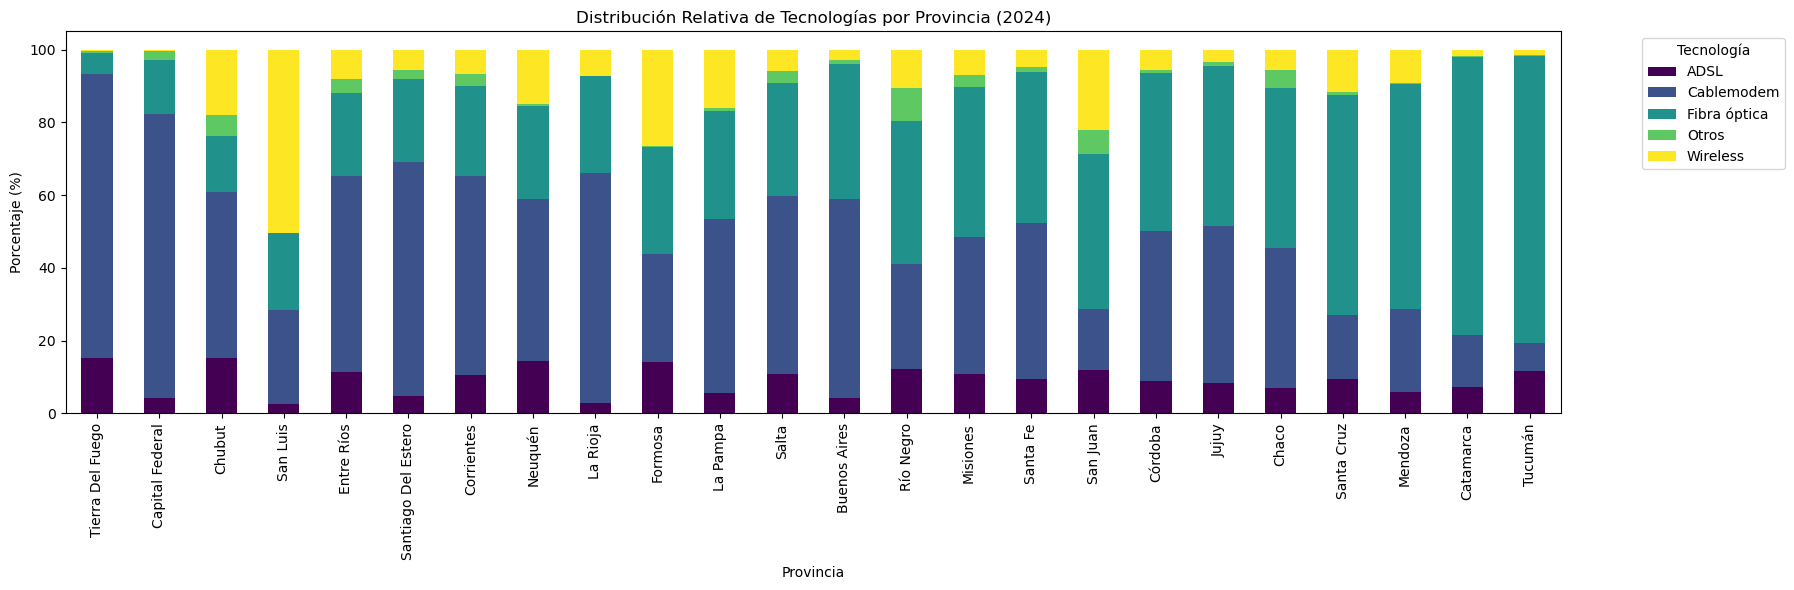

In [44]:
pivot_table_relative.plot(kind='bar', stacked=True, figsize=(18, 6), colormap='viridis')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución Relativa de Tecnologías por Provincia (2024)')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El análisis de la distribución relativa de tecnologías por provincia en 2024 evidencia el predominio de Cablemodem y Fibra Óptica como las principales tecnologías de acceso a internet en la mayoría de las regiones, reflejando una transición hacia métodos más modernos y eficientes. Sin embargo, tecnologías como Wireless y ADSL aún tienen una presencia significativa en provincias como San Luis, Formosa y Chaco, lo que podría indicar limitaciones en la infraestructura para tecnologías cableadas. Además, algunas provincias, como Chubut y La Pampa, muestran una mayor diversificación tecnológica, mientras que otras dependen predominantemente de una o dos tecnologías principales. Este panorama destaca la necesidad de priorizar inversiones en infraestructura de Fibra Óptica en regiones con alta dependencia de Wireless y ADSL, promoviendo así un acceso más equitativo y competitivo en todo el país.

### Revision de KPI

#### Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [66]:
# Filtrado de los datos para el año 2024 y el trimestre 2
dfPenetracionHogaresKPI = dfPenetracionHogares[(dfPenetracionHogares['Año'] == 2024) & (dfPenetracionHogares['Trimestre'] == 2)][['Provincia', 'Accesos por cada 100 hogares']]

dfPenetracionHogaresKPI.head()

,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,79.84
1,Capital Federal,116.37
2,Catamarca,68.81
3,Chaco,44.06
4,Chubut,86.33


In [68]:
dfPenetracionHogaresKPI['Target'] = round(dfPenetracionHogaresKPI['Accesos por cada 100 hogares'] * 1.02, 2)
dfPenetracionHogaresKPI.head()

,Provincia,Accesos por cada 100 hogares,Target
0,Buenos Aires,79.84,81.44
1,Capital Federal,116.37,118.70
2,Catamarca,68.81,70.19
3,Chaco,44.06,44.94
4,Chubut,86.33,88.06


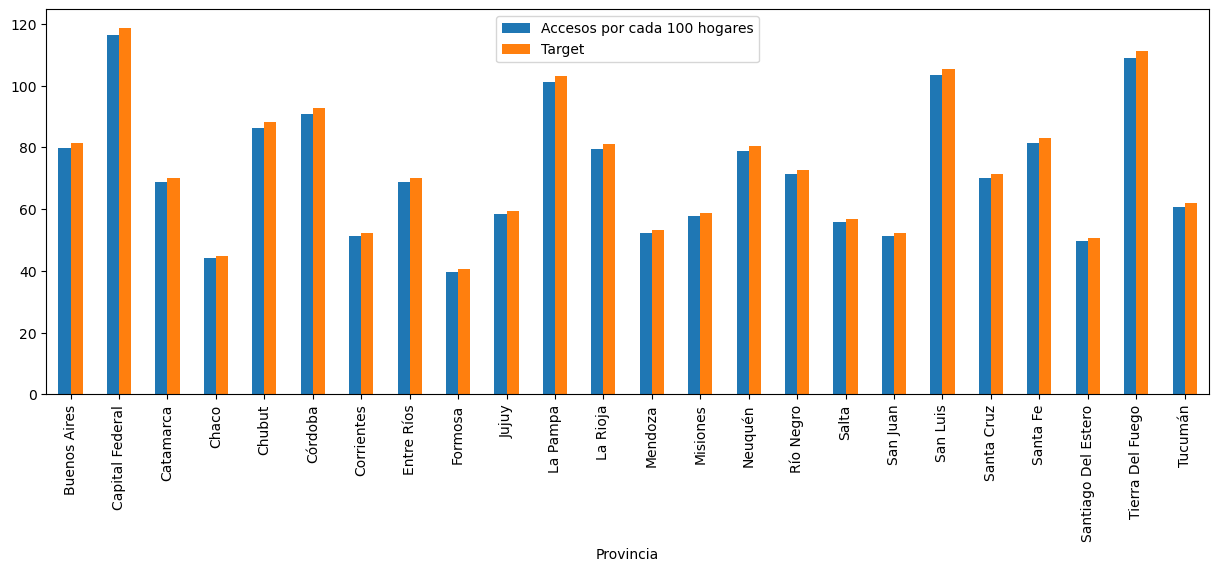

In [73]:
dfPenetracionHogaresKPI.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Target'], figsize=(15, 5))
plt.show()